In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img1_path = 'drive/MyDrive/UNI-AMRITA-SEM2/ComputerVision/images/rgb_0026.png'
img2_path = 'drive/MyDrive/UNI-AMRITA-SEM2/ComputerVision/images/rgb_0029.png'

# **1. Feature Extraction/Detection**

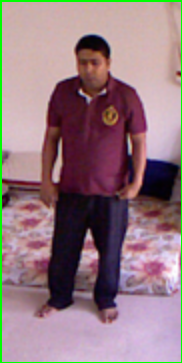

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
#Set frame path
frame1 = cv2.imread(img1_path)
frame1 = cv2.resize(frame1, (640, 480))
gray = cv2.cvtColor(frame1, cv2.COLOR_RGB2GRAY)

boxes, weights = hog.detectMultiScale(frame1, winStride=(8,8) )
boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

for (xA, yA, xB, yB) in boxes:
# display the detected boxes in the colour picture
  cv2.rectangle(frame1, (xA, yA), (xB, yB),(0, 255, 0), 2)
  frame1 = frame1[yA:yB, xA:xB]
cv2_imshow(frame1)

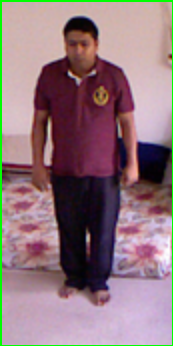

In [ ]:
frame2 = cv2.imread(img2_path)
frame2 = cv2.resize(frame2, (640, 480))
gray = cv2.cvtColor(frame2, cv2.COLOR_RGB2GRAY)

boxes, weights = hog.detectMultiScale(frame2, winStride=(8,8) )
boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

for (xA, yA, xB, yB) in boxes:
# display the detected boxes in the colour picture
  cv2.rectangle(frame2, (xA, yA), (xB, yB),(0, 255, 0), 2)
  frame2 = frame2[yA:yB, xA:xB]
cv2_imshow(frame2)

# **Haris corner detection**

In [ ]:
# Importing the libraries
import cv2
import numpy as np

gray_image = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray_image = np.float32(gray_image)

# Applying the function
dst = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)

# dilate to mark the corners
dst = cv2.dilate(dst, None)
frame1[dst > 0.01 * dst.max()] = [0, 255, 0]

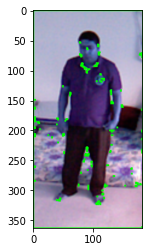

(<matplotlib.image.AxesImage at 0x7f97c9944f10>, None)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(frame1),plt.show()

In [ ]:
#Converting to B/W
gray = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

#Applying the function
dst = cv2.cornerHarris(gray,2,3,0.04)

# Dilate to mark the corners
dst = cv2.dilate(dst,None)
frame2[dst>0.01*dst.max()]=[0,0,255]


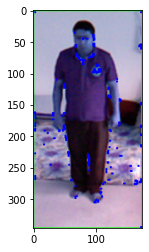

(<matplotlib.image.AxesImage at 0x7f97c993e610>, None)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(frame2),plt.show()

# **2. Feature Descriptor**

# **Oriented FAST and Rotated BRIEF (ORB)**

In [ ]:
import numpy as np
import cv2

#Apply the function
orb = cv2.ORB_create(nfeatures=200)

#Keypoints
kp = orb.detect(frame1, None)
kp, des = orb.compute(frame1, kp)
frame1 = cv2.drawKeypoints(frame1, kp, None, color=(0, 255, 0), flags=0)


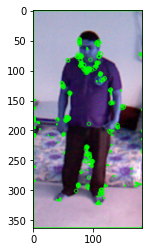

(<matplotlib.image.AxesImage at 0x7f97c93a4910>, None)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(frame1),plt.show()

# **3.Feature Matching**

# **ORB**

In [ ]:
import cv2

#Applying the function
orb = cv2.ORB_create(nfeatures=500)

#Key Points
kp1, des1 = orb.detectAndCompute(frame1, None)
kp2, des2 = orb.detectAndCompute(frame2, None)

#Bf Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

match_img = cv2.drawMatches(frame1, kp1, frame2, kp2, matches[:50], None)


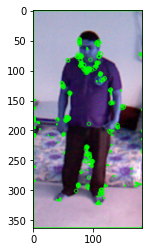

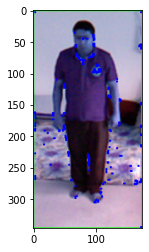

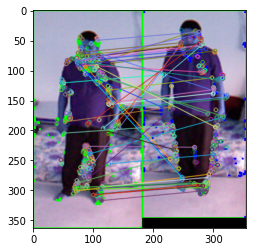

(<matplotlib.image.AxesImage at 0x7f97d7137e90>, None)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(frame1),plt.show()
plt.imshow(frame2),plt.show()
plt.imshow(match_img),plt.show()